<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-pnogueron/blob/main/Semana3_Actividad1_Equipo157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Ciencia y analítica de datos</h1>
<h2>Semana 3, actividad 1 - Selección y limpieza de datos</h2>
<h3>Octubre 03, 2022</h3>
<p>
Equipo 157 </br>
Juan Pablo Noguerón Morales - A01097897 </br>
Mauricio Xavier Muñoz Escobar - A01793598
</p>
<p>
Github link: 
</p>

<h2>Estructura de este archivo</h2>

Este archivo está estructurado en 2 secciones. </br>

La primera sección corresponde al entregable (parte 1, 2 y 3)</br>

La segunda sección tiene el código que se usó de prueba - error para poder resolver ésta actividad

# Sección 1 - Entregables. Parte 1, 2 y 3

<h2>Parte 1: Fundamentos de bases de datos</h2>



1.   Fundamentos de bases de datos para ciencias de datos:
<p>
Estrictamente hablando, las bases de datos no son otra cosa que una fuente de información; un tipo de fichero que almacena información y que la ciencia de datos usará para análisis. Las bases de datos son la piedra angular de la ciencia de datos: sin información, no hay análisis que realizar. </br>Hay muchos tipos de fuentes de información, que pueden ir desde un archivo de excel, un archivo delimitado (como un csv), un archivo de texto plano, un archivo access, un archivo en formato json, un archivo xml, hasta complejos sistemas de administración de Bases de datos relacionales y no relacionales
</br>Hablando de los sistemas de administración de bases de datos relacionales, éstos son un tipo de software especial que permite almacenar, modificar y consultar la información de manera eficaz. Hay muchos tipos diferentes (columnar, relacional, no-relacional, etc), así como empresas que se dedican a desarrollarlos (Oracle, Teradata, MySQL, por ejemplo). Algo que tienen en común -en su mayoría- es que ofrecen niveles de abstracción de la información que permite la consulta, modificación y manipulación de la misma, mediante lenguaje de modelado de datos (Data Modeling Langauge por sus siglas en inglés) y Lenguaje estructurado de consulta (Structured Query Language por sus siglas en inglés)
</p></br>
2.   Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos.
<p>
Los almacenes de datos (Data Warehouse), son una colección de bases de datos que en conjunto tienen un significado -usualmente empresarial-. Los Data Warehouse pueden estar compuestos por diferentes tipos de bases de datos / fuentes de información. Así, por ejemplo, un datawarehouse de un banco puede contener información de transacciones diarias bancarias que es alimentada mediante ficheros proveninentes de sistemas legacy como cobol / mainframe; a su vez, también puede recibir información proveniente de web services que son triggereados desde cajeros automáticos; o mediante APIS de aplicaciones de terceros, como lo son las consultas al buró de crédito para determinar el score de un dado cliente en tal fecha; podría recibir información proveninente también de DBMS en la nube con información sobre compras de tarjeta de crédito; y un largo etcétera de fuentes de información.
</br>Dato a que toda la información tiene su propio formato y proviene de diferentes fuentes, el datawarehouse tiene como una de sus principales tareas el normalizar la información, limpiarla, dimensionarla relacionarla y cargarla al DWH para su posterior consulta; dicho en otras palabras, el DWH se encarga de darle significado a la información recibida para su posterior explotación. A éste procesos se le conoce como ETL (Extracción, Transformación y Carga, por sus siglas en inglés), y su proceso y metodología como tal es tan extenso que hay carreras dedicadas a esto
</p>


<h2>Parte 2: Selección y limpieza de datos en Python</h2>

Como primer paso, realizamos la carga del archivo en nuestro data frame

In [113]:
import pandas as pd
import numpy as np
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

#Cargamos el archivo usando la liga de la DB. La primer columna la usamos como indice del Data Frame
df = pd.read_csv(path, index_col=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Procedemos a eliminar los registros con datos nulos para las columnas que se considera el mejor approach es eliminar en vez de reemplazar


In [114]:
ndf = df.copy()

targetColumns = ['Y']

for column in targetColumns:
    recordsBeforeCleaning = ndf.shape[0]
    print('El dataset antes de la limpieza tiene ', recordsBeforeCleaning, ' registros')
    print('Realizando eliminado de registros por valor nulo en columna ', column)
    ndf.dropna(inplace = True, subset=[column])
    recordsAfterCleaning = ndf.shape[0]
    print('El dataset después de la limpieza tiene ', recordsAfterCleaning, ' registros')
    print('Se han eliminado ', recordsBeforeCleaning - recordsAfterCleaning, ' registros')

    #validamos si quedan registros con valor nulo para la columna dada
    if not ndf[column].isnull().any():
        print('La columna ', column, ' ya no tiene valores nulos')
    else:
        print('La columna ', column, ' aún no tiene valores nulos')

El dataset antes de la limpieza tiene  30000  registros
Realizando eliminado de registros por valor nulo en columna  Y
El dataset después de la limpieza tiene  29997  registros
Se han eliminado  3  registros
La columna  Y  ya no tiene valores nulos


Procedemos a eliminar columnas que consideramos son irrelevantes en el estudio y cuyo valor nulo solo metería ruido

In [115]:
#Volvermos a realizar la limpieza ahora sobre el DS de copia.
targetColumns = ['X2']

for column in targetColumns:
    if column in ndf:
        columnsBeforeCleaning = ndf.shape[1]
        print('El dataset antes de la limpieza tiene ', columnsBeforeCleaning, ' columnas')
        print('Realizando eliminado de columnas por al menos un valor nulo en la columna ', column)

        if ndf[column].isnull().any():
            ndf.drop([column], axis = 1, inplace = True)

        columnsAfterCleaning = ndf.shape[1]
        print('El dataset después de la limpieza tiene ', columnsAfterCleaning, ' columnas')
        print('Se han eliminado ', columnsBeforeCleaning - columnsAfterCleaning, ' columnas')

    else:
        print('La columna ', column, ' no existe en el df')
        
ndf

El dataset antes de la limpieza tiene  24  columnas
Realizando eliminado de columnas por al menos un valor nulo en la columna  X2
El dataset después de la limpieza tiene  23  columnas
Se han eliminado  1  columnas


,X1,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Ahora realizamos el reemplazo usando moda y mediana con respecto al dataset completo. Se utiliza una lista generada aleatoriamente para, en caso de que la moda devuelva más de un valor, asigne alguno de ellos de manera aleatoria

In [116]:
import random

randomX3 = list(range(0, ndf.X3.mode().size))
randomX4 = list(range(0, ndf.X4.mode().size))

values = {"X3": ndf.X3.mode()[random.choice(randomX3)], "X4": ndf.X4.mode()[random.choice(randomX4)], "X5": ndf.X5.median()}

print('Realizando reemplazo de datos con respecto a la información en el dataset completo')

ndf.fillna(value = values, inplace = True)

print('Se puede observar que las columnas X3, X4 y X5 ya no son nulas')

ndf.isna().any()

Realizando reemplazo de datos con respecto a la información en el dataset completo
Se puede observar que las columnas X3, X4 y X5 ya no son nulas


X1     False
X3     False
X4     False
X5     False
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y      False
dtype: bool

Ahora eliminamos aquellos registros cuyo conjunto de valores para la misma métrica son todos nulos 

(X6 - X11) </br>
(X12 - X17)</br>
(X18 - X23)</br>

In [117]:
targetColumns = [
      ('X6 - X11',  ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']), 
      ('X12 - X17', ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']),
      ('X18 - X23', ['X18', 'X19', 'X20', 'X21', 'X22', 'X23'])
]

for columns in targetColumns:
    recordsBeforeCleaning = ndf.shape[0]
    print('El dataset antes de la limpieza tiene ', recordsBeforeCleaning, ' registros')
    print('Realizando eliminado de registros por valor nulo en rango de columnas ', columns[0])
    ndf.dropna(inplace = True, subset=columns[1], how = 'all')
    recordsAfterCleaning = ndf.shape[0]
    print('El dataset después de la limpieza tiene ', recordsAfterCleaning, ' registros')
    print('Se han eliminado ', recordsBeforeCleaning - recordsAfterCleaning, ' registros \n')

El dataset antes de la limpieza tiene  29997  registros
Realizando eliminado de registros por valor nulo en rango de columnas  X6 - X11
El dataset después de la limpieza tiene  29994  registros
Se han eliminado  3  registros 

El dataset antes de la limpieza tiene  29994  registros
Realizando eliminado de registros por valor nulo en rango de columnas  X12 - X17
El dataset después de la limpieza tiene  29990  registros
Se han eliminado  4  registros 

El dataset antes de la limpieza tiene  29990  registros
Realizando eliminado de registros por valor nulo en rango de columnas  X18 - X23
El dataset después de la limpieza tiene  29990  registros
Se han eliminado  0  registros 



El siguiente paso es aplicar media para los valores monetarios del universo con respecto a los otros valores DEL MISMO REGISTRO (Esta vez no se obtiene con respecto al dataset completo)

Es importante recalcar:

Las variabes X6 - X11 se llenaron usando métodos bfill y nfill

Las variables X12 - X23 usaron media

Todas las variables se calcularon con respecto a las otras columnas del mismo registro

In [118]:
ndf.loc[:, 'X6':'X6'] = ndf.loc[:, 'X6':'X7'].bfill(axis = 1)
ndf.loc[:, 'X6':'X11'] = ndf.loc[:, 'X6':'X11'].ffill(axis = 1)

cols = ndf.loc[:, 'X12':'X17'].columns
value = ndf[cols].mean(axis = 1)
ndf.fillna({x : value for x in cols}, inplace = True)

cols = ndf.loc[:, 'X18':'X23'].columns
value = ndf[cols].mean(axis = 1)
ndf.fillna({x : value for x in cols}, inplace = True)

ndf.isna().any()


X1     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

<h2>Parte 3: Preparación de los datos</h2>



**1.   ¿Qué datos considero mas importantes? ¿Por qué?**
</br> Se consideraron 3 conjuntos con mayor importancia: **Historial de pagos pasados** (X6 - X11); **Monto de estado de cuenta** (X12 - X17) y **Monto de último pago** (X18 - X23). Si bien es cierto que todas las variables podrían considerarse a la hora de crear el modelo, estos 3 son los que creemos tendrían mayor peso para predecir si un cliente caerá en impago o no
</br></br>
**2.  ¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?**
</br> Dependiendo del caso (variable) se usaron ambas técnicas. 

*   **X2: Género:** Se eliminó la columna completa si ésta tenía al menos un valor nulo. Consideramos que la variable por si sola no aporta mucho al caso y el reemplazo hubiera generado más ruido que ayuda para determinar el modelo

*   **Y: Variable de salida nula:** Se eliminaron los registros con variable de salida nula. Reemplazar el la variable de salida nos habría llevado a sesgo en el modelo

*   **Conjuntos completamente nulos:** Se eliminaron los registros que tenían todos los valores dentro del mismo conjunto de columnas completamente nulos {Historial de pagos pasados: X6 - X11; Monto de estado de cuenta: X12 - X17; Monto de último pago: X18 - X23}. La razón es que se usan las mismas columnas dentro del conjunto para preponderar los posibles valores. A falta de valores no nulos, la preponderación da nulo como resultado, y dado a que los 3 conjuntos son considerados de suma importancia para el estudio, se decidió eliminar el registro completo.

*   **Resto de variables:** El resto de valores nulos fueron computados y reemplazados usando métricas como media, mediana, etc

</br>

**3.  ¿Es necesario limpiar los datos para el análisis? Sí / No / ¿Por qué?**
</br> Si. Como se comentó en preguntas anteriores, determinamos que la nulidad de valores podría conducir a un modelado incorrecto. 
</br></br>
**4.  ¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.**
</br> Para este caso en particular no consideramos que hubiera problemas de formato. Dimos una revisada al dataset y vimos que cada columna tenía los valores o nulos o en el formato de dato esperado.
</br></br>
**5.  ¿Qué ajustes se realizaron en el proceso de limpieza de datos?**
</br> Este punto ya se respondió en la pregunta 2. Para mayor referencia revisar la tabla siguiente:

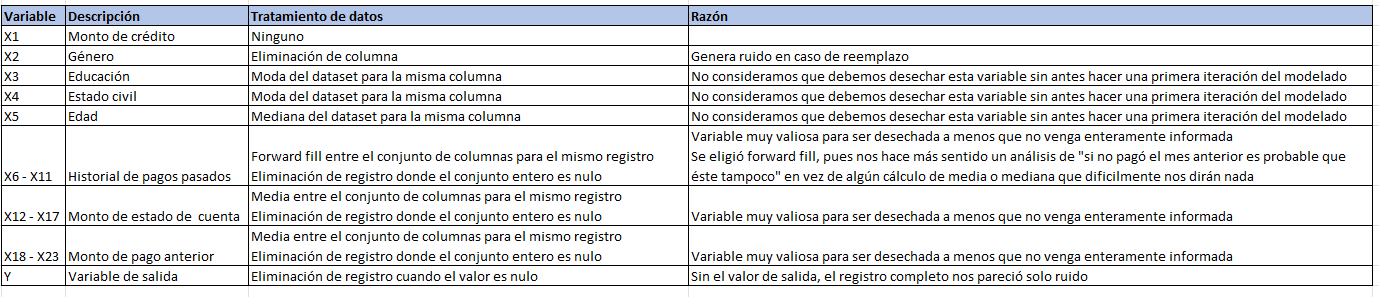

<h2>Reflexiones finales</h2>
Éste ejercicio se realizón con nuestro entendimiento de lo que cada variable representa y sobre las posibles implicaciones que tendría sobre el modelo de datos. Lo cierto es que hace falta conocimiento de dominio para poder tomar decisiones más informadas sobre lo que realmente nos interesa de cada variable y así poder determinar cuáles son útiles y cómo se deberían tratar la limpieza y selección de las mismas. 

Otro punto a considerar es que notamos que los registros con valores nulos son en realidad mínmios comparados en porcentaje con el DataSet entero, lo que nos podría también poder llevar a tomar la decisión de simplemente eliminar todos aquellos registros con datos nulos y aún así tener un buen universo de datos totalmente libre de ruido para nuestro modelado inicial. 

Finalmente, sabemos que las iteraciones son necesarias para pulir el modelo de datos, por lo que, aunque desde el inicio eliminamos registros y columnas, estamos conscientes de que en la práctica se requiere de evidencia más allá de las "corazonadas" para decidir qué se queda, que se va y que se cambia en nuestro universo de datos. 

<h2>Referencias</h2>



*   Hands-on data science and python machine learning. Kane, F. (2017)
*   SQL for Data Scientists  A Beginner's Guide for Building Datasets for Analysis. Renee M. P. Teate





# Sección 2 - Código de error y prueba

<h2>Limpieza de datos</h2>

In [ ]:
import pandas as pd
import numpy as np
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
#Cargamos el archivo usando la liga de la DB 
df = pd.read_csv(path)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Verificamos si hay datos nulos en el DataSet completo

In [ ]:
#Verificamos si hay algún dato faltante en nuestro Data Frame original
df.isnull().values.any()

True

Una vez validado que si hay datos nulos, podemos validar nulidad de datos a nivel columnar 

In [ ]:
#Una vez identificamos que hay valores nulos, podemos saber en qué columnas tenemos valores nulos con el siguiente código
df.isnull().any()

#Básicamente todos menos el id y X1 tienen por lo menos un valor nulo

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

<h2>Solución 1 - Descarte de observaciones</h2>

<h3>Descarte de registros</h3>

In [ ]:
#Podemos observar cuántos registros vamos a perder
numRecords = df.shape[0]
print('Universo original de datos antes del dropeo de registros: ', numRecords)

print('\nHaciendo limpieza de datos por descarte')

df.dropna(inplace = True)

numRecordsAfter = df.shape[0]

print('\nUniverso resultante de datos después del dropeo de registros: ', numRecordsAfter)

print('\nSe han eliminado ', numRecords - numRecordsAfter, ' registros')

if(not df.isna().values.any()):
    print('\nYa no hay ningún valor nulo en el DataFrame')
else:
    print('\nAún hay valores nulos en el Data Frame')

#validamos que ahora la funcion regresa negativo dado a que ya no hay registros con valores nulos

Universo original de datos antes del dropeo de registros:  30000

Haciendo limpieza de datos por descarte

Universo resultante de datos después del dropeo de registros:  29958

Se han eliminado  42  registros

Ya no hay ningún valor nulo en el DataFrame


<h3>Descarte de columnas</h3>

Por default, la funcion dropna eliminará registros cuando al menos un valor en cualquier columna del registro tiene nulos. También se pueden eliminar columnas enteras en vez de registros, ejemplo en el siguiente ejercicio

In [ ]:
#Volvermos a recargar el archivo
df = pd.read_csv(path, index_col=0)
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [ ]:
#Realizamos una copia del DataSet original
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [ ]:
#Volvermos a realizar la limpieza ahora sobre el DS de copia.
numCols = ndf.shape[1]

#Podemos observar cuántos registros vamos a perder
print('Columnas originales antes del dropeo por columnas: ', numCols)

print('\nHaciendo limpieza de datos por columnas')

ndf.dropna(axis = 1, inplace = True) # axis 1 is columns / axis 0 is rows. 

numColsAfter = ndf.shape[1]

print('\nColumnas resultantes después del dropeo por columnas: ', numColsAfter)

print('\nSe han eliminado ', numCols - numColsAfter, ' columnas')

if(not ndf.isna().values.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame')
else:
    print('\nAún hay valores nulos en el Data Frame')

#validamos que ahora la funcion regresa negativo dado a que ya no hay registros con valores nulos
ndf

Columnas originales antes del dropeo por columnas:  24

Haciendo limpieza de datos por columnas

Columnas resultantes después del dropeo por columnas:  1

Se han eliminado  23  columnas

Ya no hay ningún valor nulo en el Data Frame


,X1
ID,
1,20000
2,120000
3,90000
4,50000
5,50000
...,...
29996,220000
29997,150000
29998,30000


Como se puede observar, en este ejercicio se preservaron los 30,000 registros, pero se eliminaron todas aquellas columnas que tenían al menos un valor nulo.

<h3>Descarte de registros selectivo - Todas las columnas deben ser nulas</h3>

En este ejercicio, vamos a descartar solo aquellos registros que tengan todos sus valores nulos. 

In [ ]:
ndf = df.copy()
print('El Data set tiene ', ndf.shape[0], ' registros y ', ndf.shape[1], ' columnas \n')
ndf


El Data set tiene  30000  registros y  24  columnas 



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [ ]:
#Volvermos a realizar la limpieza ahora sobre el DS de copia.
numRecords = ndf.shape[0]

#Podemos observar cuántos registros vamos a perder
print('Registros originales antes del dropeo de registros selectivo: ', numRecords)

print('\nHaciendo limpieza de datos por registro selectivo (todos los valores deben ser nulos)')

ndf.dropna(how='all', inplace = True)

numRecordsAfter = ndf.shape[0]

print('\nRegistros resultantes después del dropeo de registros selectivo: ', numRecordsAfter)

print('\nSe han eliminado ', numRecords - numRecordsAfter, ' registros')

if(not ndf.isna().values.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame')
else:
    print('\nAún hay valores nulos en el Data Frame')

ndf

Registros originales antes del dropeo de registros selectivo:  30000

Haciendo limpieza de datos por registro selectivo (todos los valores deben ser nulos)

Registros resultantes después del dropeo de registros selectivo:  30000

Se han eliminado  0  registros

Aún hay valores nulos en el Data Frame


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Como se puede observar, dado a que la variable X1 está siempre reportada (nunca es nula), ningun registro es dropeado. Esto resulta en un data set resultando idéntido al original, que aún contiene valores nulos

<h3>Descarte de registros selectivo - Al menos cuatro columnas por registro tienen el valor reportado (no nulo)</h3>


En este ejercicio, vamos a mantener aquellos registros que tengan por lo menos 4 columnas no nulas. Si no tiene ni 4 columnas no nulas, entonces el registro será dropeado

In [ ]:
ndf = df.copy()
print('El Data set tiene ', ndf.shape[0], ' registros y ', ndf.shape[1], ' columnas \n')
ndf


El Data set tiene  30000  registros y  24  columnas 



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [ ]:
#Volvermos a realizar la limpieza ahora sobre el DS de copia.
numRecords = ndf.shape[0]

#Podemos observar cuántos registros vamos a perder
print('Registros originales antes del dropeo de registros selectivo: ', numRecords)

print('\nHaciendo limpieza de datos por registro selectivo (Al menos 4 columnas deben ser no nulas para mantenerse)')

ndf.dropna(thresh=4, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df

numRecordsAfter = ndf.shape[0]

print('\nRegistros resultantes después del dropeo de registros selectivo: ', numRecordsAfter)

print('\nSe han eliminado ', numRecords - numRecordsAfter, ' registros')

if(not ndf.isna().values.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame')
else:
    print('\nAún hay valores nulos en el Data Frame')

ndf

Registros originales antes del dropeo de registros selectivo:  30000

Haciendo limpieza de datos por registro selectivo (Al menos 4 columnas deben ser no nulas para mantenerse)

Registros resultantes después del dropeo de registros selectivo:  29999

Se han eliminado  1  registros

Aún hay valores nulos en el Data Frame


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Del ejercicio anterior podemos inferir que solamente uno de los registros no tenía al menos 4 columnas reportadas. Dependiendo del problema, se puede jugar con el threeshold para descartar registros. 



<h3>Descarte de columnas selectivo - Cada columna deberá tener N valores no nulos para ser preservada</h3>


En este ejercicio, vamos a mantener aquellas columnas que tengan por lo menos 29990 registros con valores no nulos para dicha columna. De lo contrario, la columna será dropeada

Nota: Se tomó el número 29,990 solo para fines ilustrativos, ya que el Data Set usado para este ejercicio tiene viene con muy pocos valores nulos por columna - registro

In [ ]:
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [ ]:
#Volvermos a realizar la limpieza ahora sobre el DS de copia.
numCols = ndf.shape[1]

#Podemos observar cuántos registros vamos a perder
print('Columnas originales antes del dropeo por columnas selectivo: ', numCols)

print('\nHaciendo limpieza de datos por columnas')

ndf.dropna(thresh = 29990,  #if there is not 5 nan values, the column will be eliminated 
           axis = 1, 
           inplace = True
           )

numColsAfter = ndf.shape[1]

print('\nColumnas resultantes después del dropeo por columnas: ', numColsAfter)

print('\nSe han eliminado ', numCols - numColsAfter, ' columnas')

if(not ndf.isna().values.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame')
else:
    print('\nAún hay valores nulos en el Data Frame')

#validamos que ahora la funcion regresa negativo dado a que ya no hay registros con valores nulos
ndf

Columnas originales antes del dropeo por columnas selectivo:  24

Haciendo limpieza de datos por columnas

Columnas resultantes después del dropeo por columnas:  15

Se han eliminado  9  columnas

Aún hay valores nulos en el Data Frame


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X17,X18,X19,X20,X23,Y
ID,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,0.0,689.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,3261.0,0.0,1000.0,1000.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,15549.0,1518.0,1500.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,29547.0,2000.0,2019.0,1200.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,19131.0,2000.0,36681.0,10000.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,15980.0,8500.0,20000.0,5003.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,1837.0,3526.0,8998.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,19357.0,0.0,0.0,22000.0,3100.0,1.0


Para fines ilustrativos tuvimos que usar un threeshold muy alto. Como resultado, nos quedamos con 15 columnas de 24

<h2>Solución 2 - Reemplazo de valores</h2>

<h3>Uso de media para reemplazar valores</h3>

In [ ]:
#mean es una funcion del dataframe que nos regresa la media de un conjunto de datos. Se puede calcular sobre una columna dada para obtener el valor de la media
#Para éste ejemplo calculamos la media de X12 -valor numerico-.

ndf = df.copy()
wm = ndf.X12.mean()
print('La media es: ', wm)

#Validamos que hay valores nulos para la columna dada
if(not ndf.isnull().X12.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame para la columna dada')
else:
    print('\nAún hay valores nulos en el Data Frame para la columna dada')

#Procedemos a reemplazar los valores nulos de la columna X6 con el valor medio de la misma
print('\nReemplazamos los valores nulos con el valor de la media')
ndf['X12'].fillna(value = wm, 
                    inplace = True)

#Validamos que hay valores nulos para la columna dada
if(not ndf.isnull().X12.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame para la columna dada')
else:
    print('\nAún hay valores nulos en el Data Frame para la columna dada')

print('\n', ndf.isnull().any())


La media es:  51236.86274967488

Aún hay valores nulos en el Data Frame para la columna dada

Reemplazamos los valores nulos con el valor de la media

Ya no hay ningún valor nulo en el Data Frame para la columna dada

 X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12    False
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool


<h3>Uso de mediana para reemplazar valores</h3>

De igual manera se puede usar la mediana en vez de la media para el reemplazo de valores

In [ ]:
# Ahora usaremos la funcion median para obtener la mediana
ndf = df.copy()

wmediana = ndf.X12.median()
print('La mediana es: ', wmediana)

#Validamos que hay valores nulos para la columna dada
if(not ndf.isnull().X12.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame para la columna dada')
else:
    print('\nAún hay valores nulos en el Data Frame para la columna dada')


#Procedemos a reemplazar los valores nulos de la columna X12 con el valor mediana de la misma
print('\nReemplazamos los valores nulos con el valor de la mediana')
ndf['X12'].fillna(value = wmediana, 
                    inplace = True)

#Validamos que hay valores nulos para la columna dada
if(not ndf.isnull().X12.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame para la columna dada')
else:
    print('\nAún hay valores nulos en el Data Frame para la columna dada')

print('\n', ndf.isnull().any())


La mediana es:  22387.0

Aún hay valores nulos en el Data Frame para la columna dada

Reemplazamos los valores nulos con el valor de la mediana

Ya no hay ningún valor nulo en el Data Frame para la columna dada

 X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12    False
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool


<h3>Uso de moda para reemplazar valores</h3>

Otra alternativa es usar la moda para el reemplazo de valores

In [ ]:
# Ahora usaremos la funcion mode para obtener la moda
ndf = df.copy()

# La moda nos va a regresar una lista, ya que puede haber varios values con la misma moda. Para este ejercicio tomamos la primer ocurrencia
wmoda = ndf.X3.mode()[0]
print('La moda es: ', wmoda)

#Validamos que hay valores nulos para la columna dada
if(not ndf.isnull().X3.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame para la columna dada')
else:
    print('\nAún hay valores nulos en el Data Frame para la columna dada')


#Procedemos a reemplazar los valores nulos de la columna X3 con el valor mediana de la misma
print('\nReemplazamos los valores nulos con el valor de la mediana')
ndf['X3'].fillna(value = wmoda, 
                    inplace = True)

#Validamos que hay valores nulos para la columna dada
if(not ndf.isnull().X3.any()):
    print('\nYa no hay ningún valor nulo en el Data Frame para la columna dada')
else:
    print('\nAún hay valores nulos en el Data Frame para la columna dada')

print('\n', ndf.isnull().any())

La moda es:  2.0

Aún hay valores nulos en el Data Frame para la columna dada

Reemplazamos los valores nulos con el valor de la mediana

Ya no hay ningún valor nulo en el Data Frame para la columna dada

 X1     False
X2      True
X3     False
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool


<h2>Selección de estrategia</h2>

In [ ]:
#Empezamos analizando el tipo de datos que tenemos
ndf = df.copy()

df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000
